In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#df_original=pd.read_csv("/home/mint/Desktop/Agam_Strabag/files/Accident-LatLon.csv")
df_original=pd.read_excel("/home/mint/Desktop/Agam_Strabag/files/Fatal_LatLon.xlsx") #-----> FOR FATAL ACCIDENTS

In [34]:
df_original=df_original.rename(columns={'Equip_LATITUDE_Fatal':'Accident_LONGITUDE','Equip_LONGITUDE_Fatal':'Accident_LATITUDE'})
df_original.head()

,Accident_LONGITUDE,Accident_LATITUDE,Accident_Chainage
0,78.33067,17.40718,1.98
1,78.31346,17.41211,3.90
2,78.30479,17.41275,4.83
3,78.28568,17.41543,6.90
4,78.25941,17.43985,11.10


In [35]:
df_latlon=df_original[['Accident_LATITUDE','Accident_LONGITUDE']]
df_latlon

,Accident_LATITUDE,Accident_LONGITUDE
0,17.40718,78.33067
1,17.41211,78.31346
2,17.41275,78.30479
3,17.41543,78.28568
4,17.43985,78.25941
...,...,...
102,17.37737,78.34931
103,17.38609,78.35143
104,17.39547,78.35081
105,17.39776,78.35059


## PLotting overall accidents on the Highway

### WIthout Intensity

In [36]:
import plotly.express as px


# Function to create scatter plot with accident frequency
def plot_accidents(df, title):
    fig = px.scatter_mapbox(df_latlon, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", 
                           color_continuous_scale=px.colors.sequential.Reds, 
                            size_max=15, zoom=8, mapbox_style="carto-positron", title=title)
    fig.show()

# Plotting the aggregated accident data
plot_accidents(df_latlon, "Accident Frequency Data- Maximum 33 accidents at a location. Total data 2618 accidents.This does not show the intensity freq at locations ")

### WIth Intensity

In [37]:
import plotly.express as px

df_freq = df_latlon.groupby(['Accident_LATITUDE', 'Accident_LONGITUDE']).size().reset_index(name='Accident_Frequency')

# Function to create scatter plot with accident frequency
def plot_accidents(df_latlon, title):
    fig = px.scatter_mapbox(df_latlon, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", size='Accident_Frequency',
                            color='Accident_Frequency', color_continuous_scale=px.colors.sequential.Reds, 
                            size_max=15, zoom=8, mapbox_style="carto-positron", title=title)
    fig.show()

# Plotting the aggregated accident data
plot_accidents(df_freq, "Accident Frequency Data- Maximum 33 accidents at a location. Total data 2618 accidents.This shows the intensity")

In [38]:
df_freq

,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
0,17.20310,78.41702,1
1,17.20345,78.39573,1
2,17.20365,78.42455,1
3,17.20404,78.47904,2
4,17.20616,78.49952,1
...,...,...,...
79,17.59244,78.51698,1
80,17.59376,78.50775,1
81,17.59902,78.49203,2
82,17.60585,78.45934,2


In [39]:
df_latlon

,Accident_LATITUDE,Accident_LONGITUDE
0,17.40718,78.33067
1,17.41211,78.31346
2,17.41275,78.30479
3,17.41543,78.28568
4,17.43985,78.25941
...,...,...
102,17.37737,78.34931
103,17.38609,78.35143
104,17.39547,78.35081
105,17.39776,78.35059


## Which coordinate has max accidents plot

In [40]:
df_freq_desc=df_freq.sort_values(by='Accident_Frequency',ascending=False)

In [41]:
df_freq_desc

,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
5,17.21209,78.52680,3
38,17.40628,78.68210,3
64,17.54945,78.27492,3
3,17.20404,78.47904,2
14,17.25050,78.37838,2
...,...,...,...
76,17.57256,78.60919,1
79,17.59244,78.51698,1
78,17.58644,78.39967,1
80,17.59376,78.50775,1


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort DataFrame by Accident_Frequency in descending order
df_freq1 = df_original.groupby(['Accident_LATITUDE', 'Accident_LONGITUDE','Accident_Chainage']).size().reset_index(name='Accident_Frequency')

df_freq_desc = df_freq1.sort_values(by='Accident_Frequency', ascending=False).reset_index()

# Plotting with Plotly Express
fig = px.bar(df_freq_desc, x='Accident_Chainage', y='Accident_Frequency', 
             title='Accident Frequency by Chainage')

fig.update_layout(xaxis={'categoryorder':'total descending'})  # Ensure x-axis categories are in descending order

fig.update_traces(marker_line_width=1.5, marker_line_color='red')  # Add border to bars for better visibility

fig.show()

In [48]:
df_freq

,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
0,17.20310,78.41702,1
1,17.20345,78.39573,1
2,17.20365,78.42455,1
3,17.20404,78.47904,2
4,17.20616,78.49952,1
...,...,...,...
79,17.59244,78.51698,1
80,17.59376,78.50775,1
81,17.59902,78.49203,2
82,17.60585,78.45934,2


## Removing Outliers

Removal of Spatial Outliers:

- Spatial Outliers: These are points that are significantly farther from other points in the dataset. In this context, outliers are accident locations that do not cluster with others and are unusually far from any cluster.
- How They Remove Outliers: They calculate the distances from each accident point to every other point. Points with distances more than three times the standard deviation of these distances are considered outliers and are removed from the analysis.


To remove outliers before clustering, you can use methods such as the z-score, the IQR method, or leverage clustering algorithms like DBSCAN which inherently can identify noise/outliers. Let's use DBSCAN to identify and remove outliers, then proceed with clustering using the remaining data.

In [43]:
#Spatial outliers removal

from geopy.distance import great_circle

# Calculate pairwise distances
coords = df_latlon[['Accident_LATITUDE', 'Accident_LONGITUDE']].values
distances = np.array([[great_circle(coord1, coord2).meters for coord2 in coords] for coord1 in coords])

# Calculate the mean and standard deviation of distances
mean_distance = distances.mean()
std_distance = distances.std()

# Identify spatial outliers
outliers = np.where(distances > mean_distance + 2 * std_distance)
outlier_indices = np.unique(outliers[0])

## No outliers in the data

In [45]:
outliers

(array([], dtype=int64), array([], dtype=int64))

In [44]:
outlier_indices
# Remove outliers
df_cleaned = df_latlon.drop(outlier_indices)

## No outlier in the given dataset for 2std/3std

### Clustering Methods to be used after removing outliers

- KMeans
- DBSCAN
- AgglomerativeClustering

## KMeans

In [51]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score


df_freq_kmeans=df_freq.copy()

kmeans = KMeans(n_clusters=20)
kmeans_labels = kmeans.fit_predict(df_freq_kmeans)

## Visualisation of Clusters

### These clusters are based on Accident Frequency

In [47]:
import plotly.express as px


# Function to create scatter plot
def plot_clusters(data, labels, title):
    df = pd.DataFrame(data, columns=['Accident_Chainage','Accident_LATITUDE', 'Accident_LONGITUDE','Accident_Frequency'])
    df['Cluster'] = labels
    fig = px.scatter_mapbox(df ,lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster", size='Accident_Frequency',
                            color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                            mapbox_style="carto-positron", title=title)

    fig.show()


In [49]:
# Plotting each clustering result
plot_clusters(df_freq_kmeans, kmeans_labels, 'K-Means Clustering')

### Now, optimising and checking which KMeans parameters are best

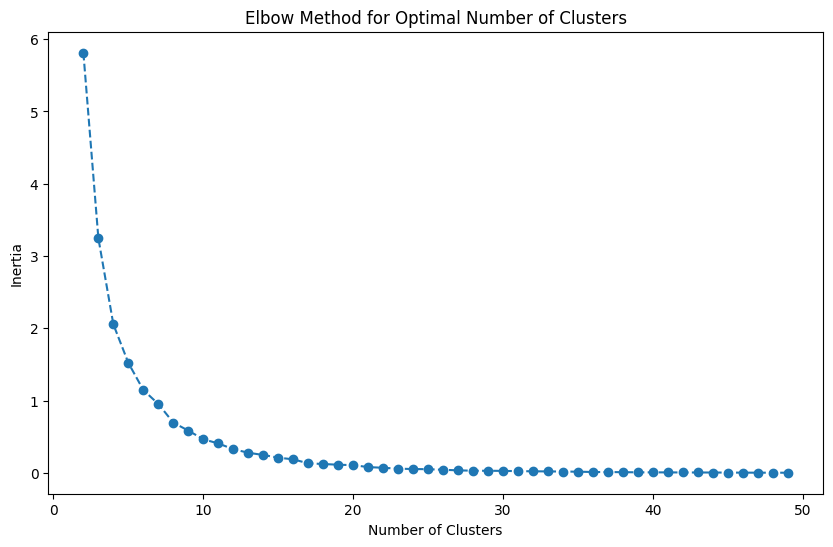

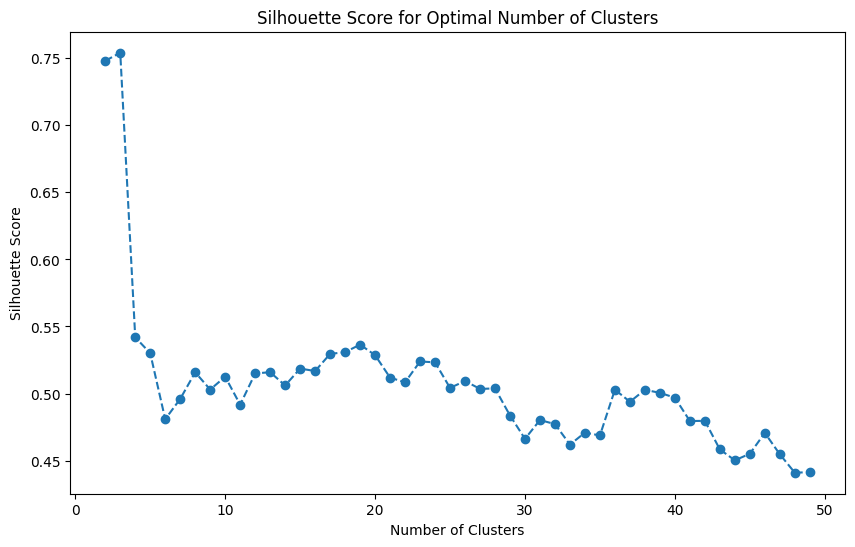

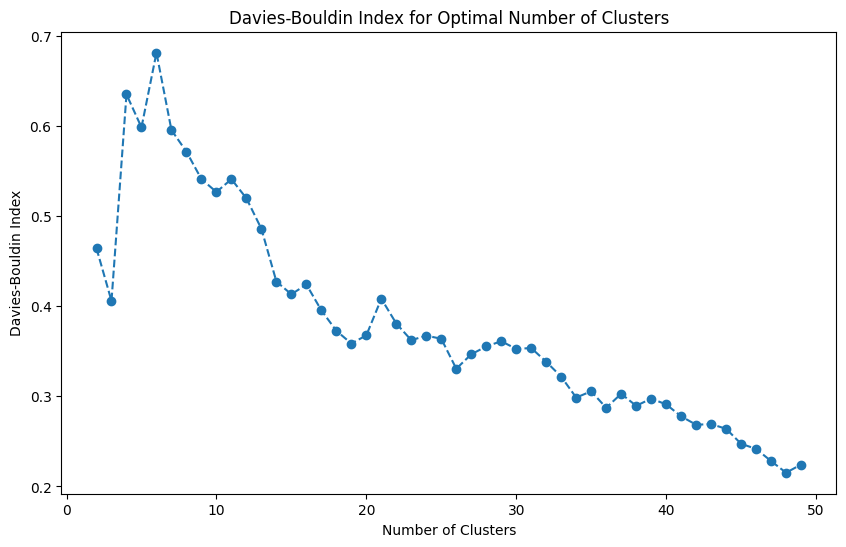

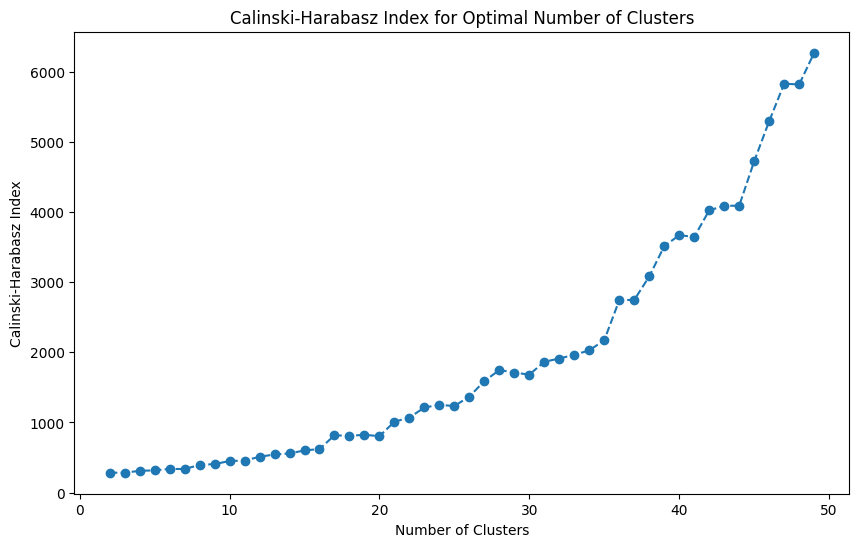

In [53]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

k_range = range(2, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_freq)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_freq, labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_freq, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_freq, labels))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Number of Clusters')
plt.show()

# Plot the Calinski-Harabasz Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal Number of Clusters')
plt.show()

### Selecting the optimal Cluster K value

### This is considering the accident freq which may not be the best parameter for clustering

In [60]:
# Choose the optimal number of clusters based on the above plots
optimal_k = 5 

df_freq_kmeans=df_freq.copy()

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_freq_kmeans)

# Add the cluster labels to the DataFrame
df_freq['Cluster'] = labels

# Plot the final clustering result
import plotly.express as px
fig = px.scatter_mapbox(df_freq, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=10, mapbox_style="carto-positron", title='Optimized KMeans Clustering')
fig.show()

### Using Lat Lon for clustering since this is not suitable

#### Total 25 clusters

In [54]:
# Choose the optimal number of clusters based on the above plots
optimal_k = 26 

df_freq_kmeans=df_freq[['Accident_LONGITUDE','Accident_LATITUDE']].copy()

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_freq_kmeans)

# Add the cluster labels to the DataFrame
df_freq_kmeans['Cluster'] = labels

# Plot the final clustering result
import plotly.express as px
fig = px.scatter_mapbox(df_freq_kmeans, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=10, mapbox_style="carto-positron", title='Optimized KMeans Clustering')
fig.show()

In [55]:
df_freq_kmeans

,Accident_LONGITUDE,Accident_LATITUDE,Cluster
0,78.41702,17.20310,17
1,78.39573,17.20345,17
2,78.42455,17.20365,17
3,78.47904,17.20404,18
4,78.49952,17.20616,18
...,...,...,...
79,78.51698,17.59244,3
80,78.50775,17.59376,3
81,78.49203,17.59902,3
82,78.45934,17.60585,14


In [56]:
df_freq_kmeans=pd.merge(df_freq_kmeans,df_freq['Accident_Frequency'],left_index=True,right_index=True)
df_freq_kmeans

,Accident_LONGITUDE,Accident_LATITUDE,Cluster,Accident_Frequency
0,78.41702,17.20310,17,1
1,78.39573,17.20345,17,1
2,78.42455,17.20365,17,1
3,78.47904,17.20404,18,2
4,78.49952,17.20616,18,1
...,...,...,...,...
79,78.51698,17.59244,3,1
80,78.50775,17.59376,3,1
81,78.49203,17.59902,3,2
82,78.45934,17.60585,14,2


### Centroid of each cluster to understand demand points

In [57]:
# Calculate the centroid for each cluster
centroids = df_freq_kmeans.groupby('Cluster').agg({
    'Accident_LATITUDE': 'mean',
    'Accident_LONGITUDE': 'mean',
    'Accident_Frequency': 'sum'
}).reset_index()
centroids = centroids[centroids['Cluster'] != -1] 

In [58]:
centroids

,Cluster,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
0,0,17.354695,78.670910,2
1,1,17.549523,78.277730,5
2,2,17.350922,78.359623,4
3,3,17.595073,78.505587,4
4,4,17.213877,78.534427,5
5,5,17.237940,78.381955,3
6,6,17.526233,78.640257,4
7,7,17.571530,78.379460,7
8,8,17.416915,78.344540,2
9,9,17.459217,78.252203,9


In [76]:
centroids.to_csv("KMeans_clusters.csv",index=False)

In [59]:
# Function to create scatter plot
def plot_centroids(data, title):
    df = pd.DataFrame(data, columns=['Accident_LATITUDE', 'Accident_LONGITUDE', 'Accident_Frequency','Cluster'])
    
    fig = px.scatter_mapbox(df, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Accident_Frequency", size='Accident_Frequency',
                            color_continuous_scale='Reds', size_max=15, zoom=10,
                            mapbox_style="carto-positron", title=title, hover_name='Cluster',
                            labels={'Accident_Frequency': 'Sum of Accident Frequency'})

    fig.update_layout(coloraxis_colorbar=dict(
        title='Sum of Accident Frequency',
        tickvals=[df['Accident_Frequency'].min(), df['Accident_Frequency'].max()],
        ticktext=[str(df['Accident_Frequency'].min()), str(df['Accident_Frequency'].max())],
    ))

    fig.show()

plot_centroids(centroids, 'KMeans Cluster Centroids')

## Cluster Method2- DBSCAN WIth optimisation epsilion

### Calculating distance between locations for DBSCAN epsilon

In [61]:
from geopy.distance import great_circle

def greatcircle(x,y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

### Converting data into radian for using Haversine

In [62]:
from math import radians
from sklearn.metrics.pairwise import haversine_distances

# Convert latitude and longitude to radians
df_latlon['lat_radians'] = np.radians(df_latlon['Accident_LATITUDE'])
df_latlon['lon_radians'] = np.radians(df_latlon['Accident_LONGITUDE'])

# Calculate Haversine distance matrix (in kilometers)
distance_matrix = haversine_distances(df_latlon[['lat_radians', 'lon_radians']])

In [63]:
distance_matrix

array([[0.00000000e+00, 2.99248474e-04, 4.41826217e-04, ...,
        3.92782713e-04, 3.70260182e-04, 5.73479515e-04],
       [2.99248474e-04, 0.00000000e+00, 1.44817301e-04, ...,
        6.86495699e-04, 6.67164853e-04, 7.90393239e-04],
       [4.41826217e-04, 1.44817301e-04, 0.00000000e+00, ...,
        8.23633309e-04, 8.06381398e-04, 9.25294918e-04],
       ...,
       [3.92782713e-04, 6.86495699e-04, 8.23633309e-04, ...,
        0.00000000e+00, 4.01356419e-05, 5.58718256e-04],
       [3.70260182e-04, 6.67164853e-04, 8.06381398e-04, ...,
        4.01356419e-05, 0.00000000e+00, 5.20771997e-04],
       [5.73479515e-04, 7.90393239e-04, 9.25294918e-04, ...,
        5.58718256e-04, 5.20771997e-04, 0.00000000e+00]])

In [64]:
df_latlon_radians=np.column_stack([np.radians(df_latlon['Accident_LATITUDE']),np.radians(df_latlon['Accident_LONGITUDE'])])

In [72]:
epsilon=0.000032 #distance in metres half of blind spot 0.3km = 300m  0.000047 is 300m
min_sample=3

df_dbscan=df_latlon.copy()

dbscan=DBSCAN(eps=epsilon, min_samples=min_sample,metric='haversine')
dbscan_labels=dbscan.fit_predict(df_latlon_radians)

# Add the labels to the original dataframe
df_dbscan['Cluster'] = dbscan_labels

# Plot the final clustering result
import plotly.express as px
fig = px.scatter_mapbox(df_dbscan, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=8.5, mapbox_style="carto-positron", title='DBSCAN Clustering')
fig.show()

### Checking for unique Lat Lon to see if unique lat long have impacts- 268 rows

In [73]:


df_freq_radians=np.column_stack([np.radians(df_freq['Accident_LATITUDE']),np.radians(df_freq['Accident_LONGITUDE'])])
df_freq_radians.shape

(84, 2)

In [75]:
epsilon=0.000035 #distance in metres half of blind spot 0.3km = 300m
min_sample=3

df_dbscan=df_latlon.copy()
df_freq_dbscan=df_freq.copy()

dbscan=DBSCAN(eps=epsilon, min_samples=min_sample,metric='haversine')
dbscan_labels=dbscan.fit_predict(df_freq_radians)

# Add the labels to the original dataframe
df_freq_dbscan['Cluster'] = dbscan_labels

# Plot the final clustering result
import plotly.express as px
fig = px.scatter_mapbox(df_freq_dbscan, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=8.5, mapbox_style="carto-positron", title='DBSCAN Clustering')
fig.show()

### Using DBSCAN with 300m epsilon and min samples=3 Clusters formed are 14

In [32]:
unique_labels = np.unique(df_freq_dbscan['Cluster'])

print(unique_labels)

KeyError: 'Cluster'

### Optimizing the DBSCAN using Threshold distance by max. Z-score

In [311]:
def calculate_z_score(epsilon):
    dbscan = DBSCAN(eps=epsilon, min_samples=3, metric='haversine')
    labels = dbscan.fit_predict(np.radians(df_freq_radians))
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_noise = list(labels).count(-1)
    z_score = (num_clusters - num_noise) / np.sqrt(num_clusters + num_noise)  # Simplified example, replace with actual calculation
    return z_score

eps_values = np.array([0.000045, 0.000047,0.000040,0.000035])
z_scores = [calculate_z_score(eps) for eps in eps_values]
optimal_epsilon = eps_values[np.argmax(z_scores)]

In [312]:
optimal_epsilon

np.float64(4.5e-05)

### Maximum Z-Score obtained at e=0.000045

## Optimising DBSCAN- Silhoutte score for min_sample

In [339]:
from sklearn.metrics import silhouette_score

epsilon=[0.000045,0.000050, 0.000040,0.00015]

min_samples=[3,4,5,6,8,9]

sil_avg = []
max_value = [0,0,0,0,0.0]
clusters=[]
noises=[]

eps_list = []
min_samples_list = []
clusters_list = []
noise_list = []
silhouette_list = []


for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(df_latlon_radians)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        clusters.append(n_clusters_)
        n_noise_ = list(labels).count(-1)
        noises.append(n_noise_)

        silhouette_avg = silhouette_score(df_latlon_radians, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

        print(f"Epsilon--{i}")
        print(f"Min_samples--{j}")
        print(f"Number of clusters: {n_clusters_}")
        print(f"NUmber of Noise--{n_noise_}")
        print(f"Silhouette Score--{silhouette_avg}")
        print("-------------------------------------")

                # Store results in lists
        eps_list.append(epsilon[i])
        min_samples_list.append(min_samples[j])
        clusters_list.append(n_clusters_)
        noise_list.append(n_noise_)
        silhouette_list.append(silhouette_avg)

    
# Create DataFrame from lists
results_dbscan_opt = pd.DataFrame({
    'Epsilon': eps_list,
    'Min_samples': min_samples_list,
    'Num_clusters': clusters_list,
    'Num_noise': noise_list,
    'Silhouette_score': silhouette_list
})

Epsilon--0
Min_samples--0
Number of clusters: 188
NUmber of Noise--6
Silhouette Score--0.9285553180877281
-------------------------------------
Epsilon--0
Min_samples--1
Number of clusters: 181
NUmber of Noise--27
Silhouette Score--0.9129122885297817
-------------------------------------
Epsilon--0
Min_samples--2
Number of clusters: 172
NUmber of Noise--63
Silhouette Score--0.8882304759165924
-------------------------------------
Epsilon--0
Min_samples--3
Number of clusters: 165
NUmber of Noise--98
Silhouette Score--0.8619164164754308
-------------------------------------
Epsilon--0
Min_samples--4
Number of clusters: 146
NUmber of Noise--223
Silhouette Score--0.7691231019375036
-------------------------------------
Epsilon--0
Min_samples--5
Number of clusters: 135
NUmber of Noise--311
Silhouette Score--0.7090211524599818
-------------------------------------
Epsilon--1
Min_samples--0
Number of clusters: 183
NUmber of Noise--6
Silhouette Score--0.9208637978335147
-----------------------

In [340]:
results_dbscan_opt

,Epsilon,Min_samples,Num_clusters,Num_noise,Silhouette_score
0,0.000045,3,188,6,0.928555
1,0.000045,4,181,27,0.912912
2,0.000045,5,172,63,0.888230
3,0.000045,6,165,98,0.861916
4,0.000045,8,146,223,0.769123
5,0.000045,9,135,311,0.709021
6,0.000050,3,183,6,0.920864
7,0.000050,4,176,27,0.905221
8,0.000050,5,167,63,0.880811
9,0.000050,6,160,98,0.854866


## PLotting the results

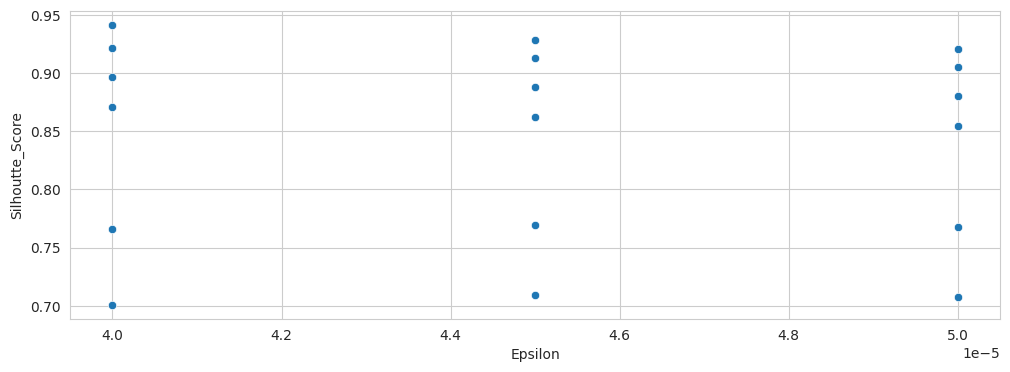

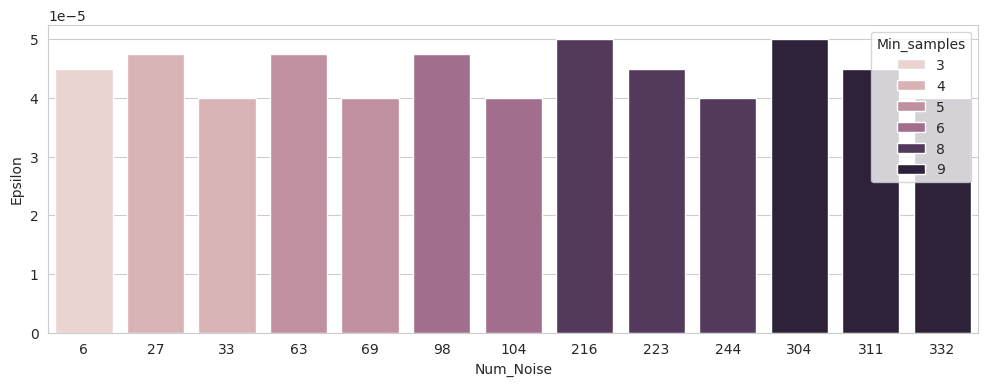

In [126]:
plt.figure(figsize=(12, 4))
import seaborn as sns

sns.set_style("whitegrid")
sns.scatterplot(results_dbscan_opt, x="Epsilon",y="Silhouette_score")
plt.xlabel("Epsilon")
plt.ylabel("Silhoutte_Score")
plt.show()

plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")
sns.barplot(results_dbscan_opt, x="Num_noise",y="Epsilon",hue="Min_samples",errorbar=None)
plt.xlabel("Num_Noise")
plt.ylabel("Epsilon")
plt.show()


In [127]:
print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 4e-05 
min_sample= 3 
number of clusters= 194 
average silhouette score= 0.9417


In [318]:
df_freq_dbscan

,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency,Cluster
0,17.20308,78.40223,1,-1
1,17.20310,78.41702,3,-1
2,17.20314,78.47639,9,1
3,17.20343,78.40576,7,-1
4,17.20343,78.41515,7,-1
...,...,...,...,...
263,17.60319,78.47647,1,-1
264,17.60456,78.46746,7,-1
265,17.60585,78.45934,17,-1
266,17.60691,78.44021,15,-1


## Calculating centroids of each clusters and identifying hotspots

In [341]:
# Calculate the centroid for each cluster
centroids = df_freq_dbscan.groupby('Cluster').agg({
    'Accident_LATITUDE': 'mean',
    'Accident_LONGITUDE': 'mean',
    'Accident_Frequency': 'sum'
}).reset_index()
centroids = centroids[centroids['Cluster'] != -1] 

### Now for this i need centroid of each cluster

In [342]:
centroids

,Cluster,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
1,0,17.206107,78.395033,60
2,1,17.203393,78.418907,16
3,2,17.203834,78.476180,47
4,3,17.204097,78.457570,28
5,4,17.205100,78.494550,16
6,5,17.211040,78.522099,59
7,6,17.217590,78.548237,25
8,7,17.231190,78.576391,58
9,8,17.251335,78.379142,108
10,9,17.243717,78.598850,27


In [343]:

# Function to create scatter plot for centroids
def plot_centroids(data, title):

    # Plot centroids on Mapbox map using Plotly Express
    fig = px.scatter_mapbox(data, lat="Accident_LATITUDE", lon="Accident_LONGITUDE",
                        color="Accident_Frequency", hover_name="Cluster",size='Accident_Frequency',
                        color_continuous_scale='Reds',
                        size_max=20, zoom=8, mapbox_style="carto-positron",
                        title="Cluster Centroids")
    #fig.update_traces(marker={'size': 10})
    fig.show()

# Plotting the centroids
plot_centroids(centroids, 'Cluster Centroids')

## Optimising DBSCAN

### Selecting optimal epsilon value using K-distance plot with elbow point

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df_dbscan_opt=df_latlon.copy()
# Fit the NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=5, metric='haversine')
neighbors_fit = neighbors.fit(df_dbscan_opt[['latitude', 'longitude']])
distances, indices = neighbors_fit.kneighbors(df_dbscan_opt[['latitude', 'longitude']])

# Sort distances for the k-distance plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('k-distance plot')
plt.show()

In [ ]:
epsilon = 0.001  # Adjust this value based on k-distance plot
min_samples = 5  # Adjust based on the density of your data

df_dbscan=df_latlon.copy()
df_freq_dbscan=df_freq.copy()

# Haversine metric needs pairwise distances in radians
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')

dbscan_labels=dbscan.fit_predict(df_dbscan)

# Add the labels to the original dataframe
df_dbscan['Cluster'] = dbscan_labels

# Plot the final clustering result
import plotly.express as px
fig = px.scatter_mapbox(df_dbscan, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=10, mapbox_style="carto-positron", title='DBSCAN Clustering')
fig.show()

### Checking the centroids of df_freq_dbscan
#### The clusters show 14 locations which are centroids of accidents with sum of accidents shown with intensity

In [191]:
# Calculate the centroid for each cluster
centroids = df_freq_dbscan.groupby('Cluster').agg({
    'Accident_LATITUDE': 'mean',
    'Accident_LONGITUDE': 'mean',
    'Accident_Frequency': 'sum'
}).reset_index()
centroids = centroids[centroids['Cluster'] != -1] 

In [196]:
# Function to create scatter plot
def plot_centroids(data, title):
    df = pd.DataFrame(data, columns=['Accident_LATITUDE', 'Accident_LONGITUDE', 'Accident_Frequency','Cluster'])
    
    fig = px.scatter_mapbox(df, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Accident_Frequency", size='Accident_Frequency',
                            color_continuous_scale='Reds', size_max=15, zoom=10,
                            mapbox_style="carto-positron", title=title, hover_name='Cluster',
                            labels={'Accident_Frequency': 'Sum of Accident Frequency'})

    fig.update_layout(coloraxis_colorbar=dict(
        title='Sum of Accident Frequency',
        tickvals=[df['Accident_Frequency'].min(), df['Accident_Frequency'].max()],
        ticktext=[str(df['Accident_Frequency'].min()), str(df['Accident_Frequency'].max())],
    ))

    fig.show()

plot_centroids(centroids, 'Cluster Centroids')

## Clustering Method3- OPTICS

### OPTICS- 20 clusters

In [272]:
from sklearn.cluster import OPTICS
df_optics=df_latlon.copy()
df_freq_optics=df_freq.copy()

df_freq_radians=np.column_stack([np.radians(df_freq['Accident_LATITUDE']),np.radians(df_freq['Accident_LONGITUDE'])])

optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 3,metric='haversine')

optic_labels= optics_model.fit_predict(df_freq_radians)

# Add the labels to the original dataframe
df_freq_optics['Cluster'] = optic_labels

import plotly.express as px
fig = px.scatter_mapbox(df_freq_optics, lat="Accident_LATITUDE", lon="Accident_LONGITUDE", color="Cluster",
                        size_max=15, zoom=10, mapbox_style="carto-positron", title='OPTICS Clustering')
fig.show()

In [333]:
# Calculate the centroid for each cluster
centroids = df_freq_optics.groupby('Cluster').agg({
    'Accident_LATITUDE': 'mean',
    'Accident_LONGITUDE': 'mean',
    'Accident_Frequency': 'sum'
}).reset_index()
centroids = centroids[centroids['Cluster'] != -1] 

In [334]:
centroids

,Cluster,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency
1,0,17.205428,78.401002,76
2,1,17.254877,78.379136,106
3,2,17.319816,78.374555,96
4,3,17.353395,78.358262,118
5,4,17.397160,78.349367,73
6,5,17.407211,78.329539,76
7,6,17.425826,78.358336,33
8,7,17.203945,78.478525,52
9,8,17.207530,78.505857,18
10,9,17.213851,78.533717,76


### Centroids of OPTICS with sum of accidents at LatLon

In [336]:
# Function to create scatter plot
def plot_centroids(data, title):
    df = pd.DataFrame(data, columns=['Accident_LATITUDE', 'Accident_LONGITUDE', 'Accident_Frequency','Cluster'])
    
    fig = px.scatter_mapbox(df,
                            lat="Accident_LATITUDE", lon="Accident_LONGITUDE",
                            color="Accident_Frequency", 
                            size='Accident_Frequency',
                            color_continuous_scale='Reds', 
                            size_max=20, zoom=10,
                            mapbox_style="carto-positron", title=title, hover_name='Cluster',
                            labels={'Accident_Frequency': 'Sum of Accident Frequency'})

    fig.update_layout(coloraxis_colorbar=dict(
        title='Sum of Accident Frequency',
        tickvals=[df['Accident_Frequency'].min(), df['Accident_Frequency'].max()],
        ticktext=[str(df['Accident_Frequency'].min()), str(df['Accident_Frequency'].max())],
    ))

    fig.show()

plot_centroids(centroids, 'Cluster Centroids')

## Sanity check of sum accidents each lat lon

,Accident_LATITUDE,Accident_LONGITUDE,Accident_Frequency,Cluster
0,17.20308,78.40223,1,9
1,17.20310,78.41702,3,6
2,17.20314,78.47639,9,15
3,17.20343,78.40576,7,4
4,17.20343,78.41515,7,4
...,...,...,...,...
263,17.60319,78.47647,1,9
264,17.60456,78.46746,7,4
265,17.60585,78.45934,17,19
266,17.60691,78.44021,15,23
